<a href="https://colab.research.google.com/github/greenelab/CBIS_ATAC_2022/blob/main/BI_scanpy_practice_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting 
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#checking folder
!ls

gdrive	sample_data


In [3]:
#acessing the Bioinformatics folder
%cd gdrive/My Drive/Colab Notebooks/Bioinformatics

/content/gdrive/My Drive/Colab Notebooks/Bioinformatics


In [4]:
#Data Download 
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
!mkdir write

mkdir: cannot create directory ‘data’: File exists
--2022-07-01 18:23:49--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2022-07-01 18:23:49--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  --.-KB/s    in 0.1s    

2022-07-01 18:23:49

In [ ]:
!git clone https://github.com/scverse/scanpy-tutorials.git

fatal: destination path 'scanpy-tutorials' already exists and is not an empty directory.


In [6]:
#install scanpy for python 3
!pip3 install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.6 MB/s 
     |████████████████████████████████| 88 kB 9.0 MB/s 
     |████████████████████████████████| 96 kB 6.8 MB/s 
     |████████████████████████████████| 11.2 MB 48.5 MB/s 
     |████████████████████████████████| 930 kB 58.2 MB/s 
     |████████████████████████████████| 1.1 MB 61.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9c58e018a9f5db4f7328657e2a8bfa90ace2a34d19e74833894cfb9b2fe2eb7c
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=f973f6e3c231c440321fe957c57c435a1e124b5aed5f53374cd3ec1fbe79135a
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f

In [54]:
#errors with matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip3 install tl.testing 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.7 MB/s 
  Created wheel for tl.testing: filename=tl.testing-0.5-py3-none-any.whl size=33250 sha256=5e24554380aefd4b07e84bf1988b4ae255ece16de75323077554a456e77c61d9
  Stored in directory: /root/.cache/pip/wheels/f4/13/64/ef7c62f29971b03f0bbc74c44e996d473e4b9458ce6e3747d5
  Created wheel for manuel: filename=manuel-1.12.4-py3-none-any.whl size=43200 sha256=6ca8ab06a4f6bdab0d4f16b4dc35d5611a0a1341cac2b3bb61b3d62bf4312715
  Stored in directory: /root/.cache/pip/wheels/06/69/0f/0f203be2a1af7babdf41b65d879b431ae189c54163174d6896
Successfully built tl.testing manuel


In [7]:
#imports 
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.4.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 pynndescent==0.5.7


In [8]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [9]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

In [10]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [11]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


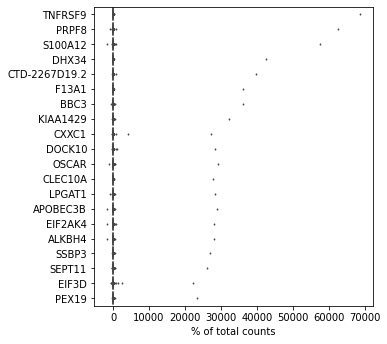

In [55]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [15]:
#gene filtering 
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Information about mitochondrial genes 
>Why would we want this information?

Citing from “Simple Single Cell” workflows (Lun, McCarthy & Marioni, 2017):

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

With pp.calculate_qc_metrics, we can compute many metrics very efficiently.

In [16]:
#metric computation using pp.calculate_qc_metrics
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

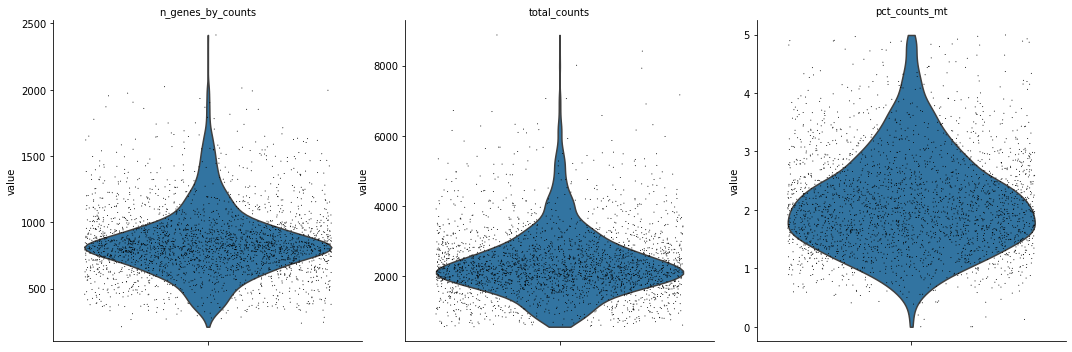

In [56]:
#violin plot 
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

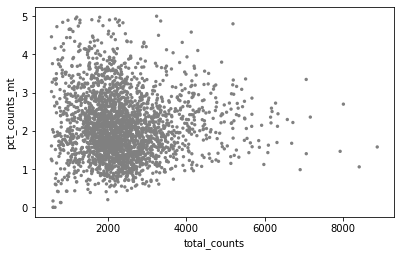

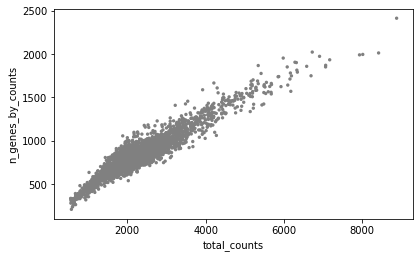

In [57]:
#"denoising" where we take out the cells that have too many mitochondrial genes
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
#true filtering 
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells.

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
#logarithmize 
sc.pp.log1p(adata)

In [22]:
#find the highly-variable genes 
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

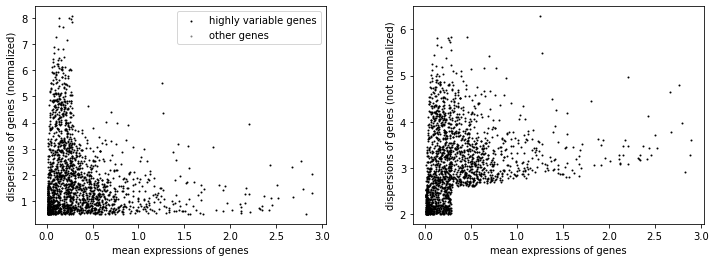

In [58]:
sc.pl.highly_variable_genes(adata)

Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.


In [24]:
# You can get back an AnnData 
# of the object in .raw by calling .raw.to_adata().
adata.raw = adata

This portion is mildly useless, but this is practice so loml 

In [25]:
#filtering 
adata = adata[:, adata.var.highly_variable]

In [26]:
#regress + data scling to unit varience 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
#Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

PCA time bby 

In [28]:
sc.tl.pca(adata, svd_solver='arpack')

TypeError: ignored

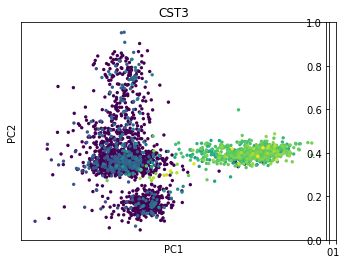

In [60]:
#Scatter plot w/ PCA coordinates 
sc.pl.pca(adata, color='CST3')

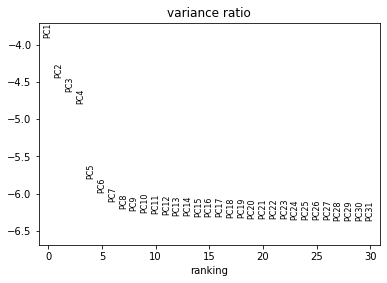

In [61]:
#rough estimating of the PCs
sc.pl.pca_variance_ratio(adata, log=True)

In [62]:
#save those reults 
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [63]:
#PCS representation of the data matrix is used to find
# the neightborhood fraph of cells 
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)


 In some ocassions, you might still observe disconnected clusters and similar connectivity violations. They can usually be remedied by running:

In [64]:
sc.tl.umap(adata)


computing UMAP
    finished (0:00:07)


In [65]:
!pip3 install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
#clustering!!
sc.tl.leiden(adata)

TypeError: ignored

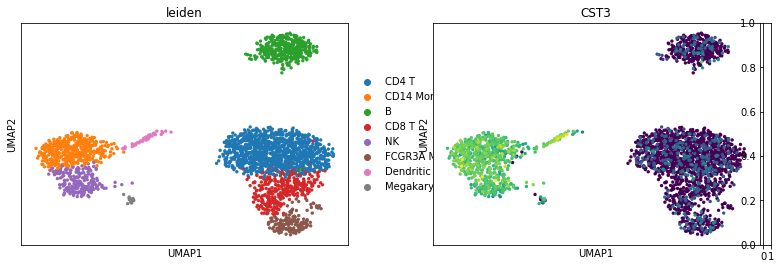

In [66]:
#plotting culters 
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [67]:
adata.write(results_file)

Marker Genes ... nahhhh

In [68]:
#gene ranking
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes


KeyError: ignored

In [37]:
sc.settings.verbosity = 2  # reduce the verbosity

The result of a Wilcoxon rank-sum (Mann-Whitney-U) test is very similar.


In [69]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes


KeyError: ignored

In [70]:
adata.write(results_file)

Gene ranking w/ logistics regression 


In [71]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes


KeyError: ignored

In [72]:
#defining marker genes in an array because you will def not remember david 

In [41]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [42]:
#this reloads the results 
adata = sc.read(results_file)

In [43]:
#create a data frame 
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7
0,RPS12,S100A9,CD74,CCL5,LST1,NKG7,HLA-DPA1,PF4
1,LDHB,LYZ,CD79A,NKG7,AIF1,GNLY,HLA-DPB1,SDPR
2,RPS25,S100A8,HLA-DRA,B2M,FCER1G,GZMB,HLA-DRA,GNG11
3,RPS27,TYROBP,CD79B,CST7,COTL1,CTSW,HLA-DRB1,PPBP
4,RPS6,FCN1,HLA-DPB1,IL32,FTH1,PRF1,CD74,NRGN


In [44]:
#the following data table will keep track fo the scores each group has recieved 
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,RPS12,1.403498e-219,S100A9,1.842655e-227,CD74,3.043536e-182,CCL5,3.380869e-122,LST1,1.419732e-110,NKG7,1.203971e-96,HLA-DPA1,5.422417e-21,PF4,4.722886e-10
1,LDHB,2.805350e-214,LYZ,8.413552e-227,CD79A,6.860832e-170,NKG7,4.248878e-97,AIF1,7.130846e-107,GNLY,1.257170e-88,HLA-DPB1,7.591860e-21,SDPR,4.733899e-10
2,RPS25,4.573405e-194,S100A8,1.257243e-222,HLA-DRA,8.389292e-166,B2M,5.449722e-84,FCER1G,1.045064e-106,GZMB,1.429027e-88,HLA-DRA,1.306768e-19,GNG11,4.733899e-10
3,RPS27,1.164214e-185,TYROBP,6.067012e-198,CD79B,1.171444e-153,CST7,1.850639e-77,COTL1,9.908055e-105,CTSW,4.144726e-87,HLA-DRB1,1.865104e-19,PPBP,4.744938e-10
4,RPS6,8.887042e-183,FCN1,4.894805e-190,HLA-DPB1,6.167786e-148,IL32,7.057861e-74,FTH1,3.935567e-99,PRF1,1.692100e-85,CD74,5.853161e-19,NRGN,4.800511e-10


In [45]:
#single cluster ranking 
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,RPS12,1.403498e-219,S100A9,1.842655e-227,CD74,3.043536e-182,CCL5,3.380869e-122,LST1,1.419732e-110,NKG7,1.203971e-96,HLA-DPA1,5.422417e-21,PF4,4.722886e-10
1,LDHB,2.805350e-214,LYZ,8.413552e-227,CD79A,6.860832e-170,NKG7,4.248878e-97,AIF1,7.130846e-107,GNLY,1.257170e-88,HLA-DPB1,7.591860e-21,SDPR,4.733899e-10
2,RPS25,4.573405e-194,S100A8,1.257243e-222,HLA-DRA,8.389292e-166,B2M,5.449722e-84,FCER1G,1.045064e-106,GZMB,1.429027e-88,HLA-DRA,1.306768e-19,GNG11,4.733899e-10
3,RPS27,1.164214e-185,TYROBP,6.067012e-198,CD79B,1.171444e-153,CST7,1.850639e-77,COTL1,9.908055e-105,CTSW,4.144726e-87,HLA-DRB1,1.865104e-19,PPBP,4.744938e-10
4,RPS6,8.887042e-183,FCN1,4.894805e-190,HLA-DPB1,6.167786e-148,IL32,7.057861e-74,FTH1,3.935567e-99,PRF1,1.692100e-85,CD74,5.853161e-19,NRGN,4.800511e-10


sc.pl.rank_genes_groups_violin gives a more detailed view of a group 

In [46]:
sc.pl.rank_genes_groups_violin


<function scanpy.plotting._tools.rank_genes_groups_violin>

Computed differential expression 

In [73]:
adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

KeyError: ignored

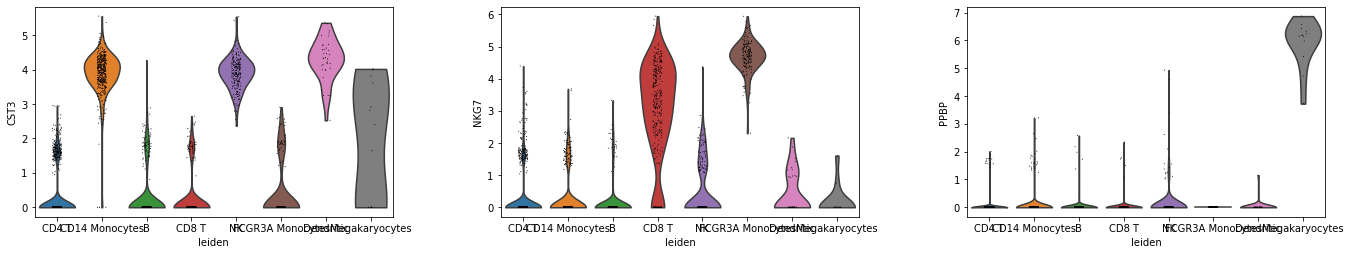

In [74]:
#comparing a specfic gene across a set of selected groups 
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


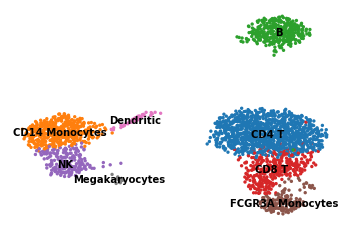

In [75]:
#marking the cell types becuase ig 
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)
#actually makes the figure 
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [50]:
#the visualizing component delila 
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

ImportError: ignored

<Figure size 560.88x273.6 with 4 Axes>

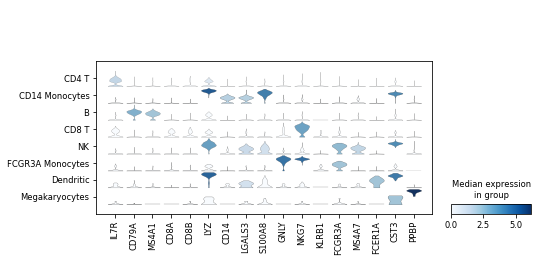

In [76]:
#creatign a compact violin plot 
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [77]:
adata #data storage from AnnData 

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [78]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [79]:
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )